In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import scatterplot as scatter
from fcmeans import FCM


In [2]:
data=pd.read_csv('wine-clustering.csv')

In [3]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<AxesSubplot:>

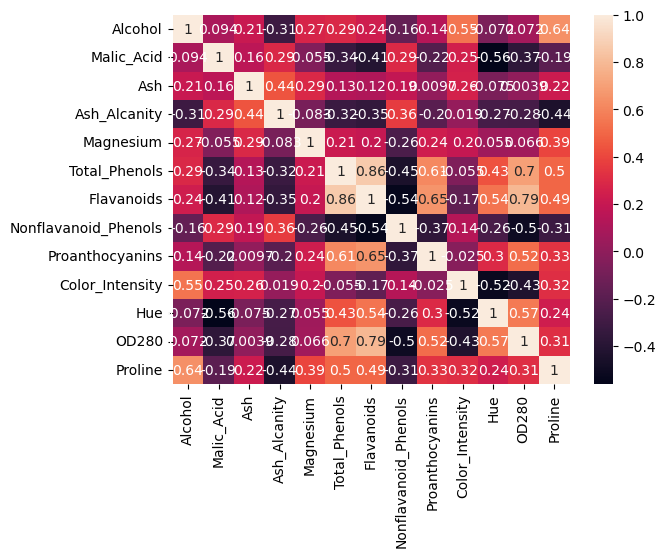

In [39]:
sns.heatmap(data.corr(),annot=True)

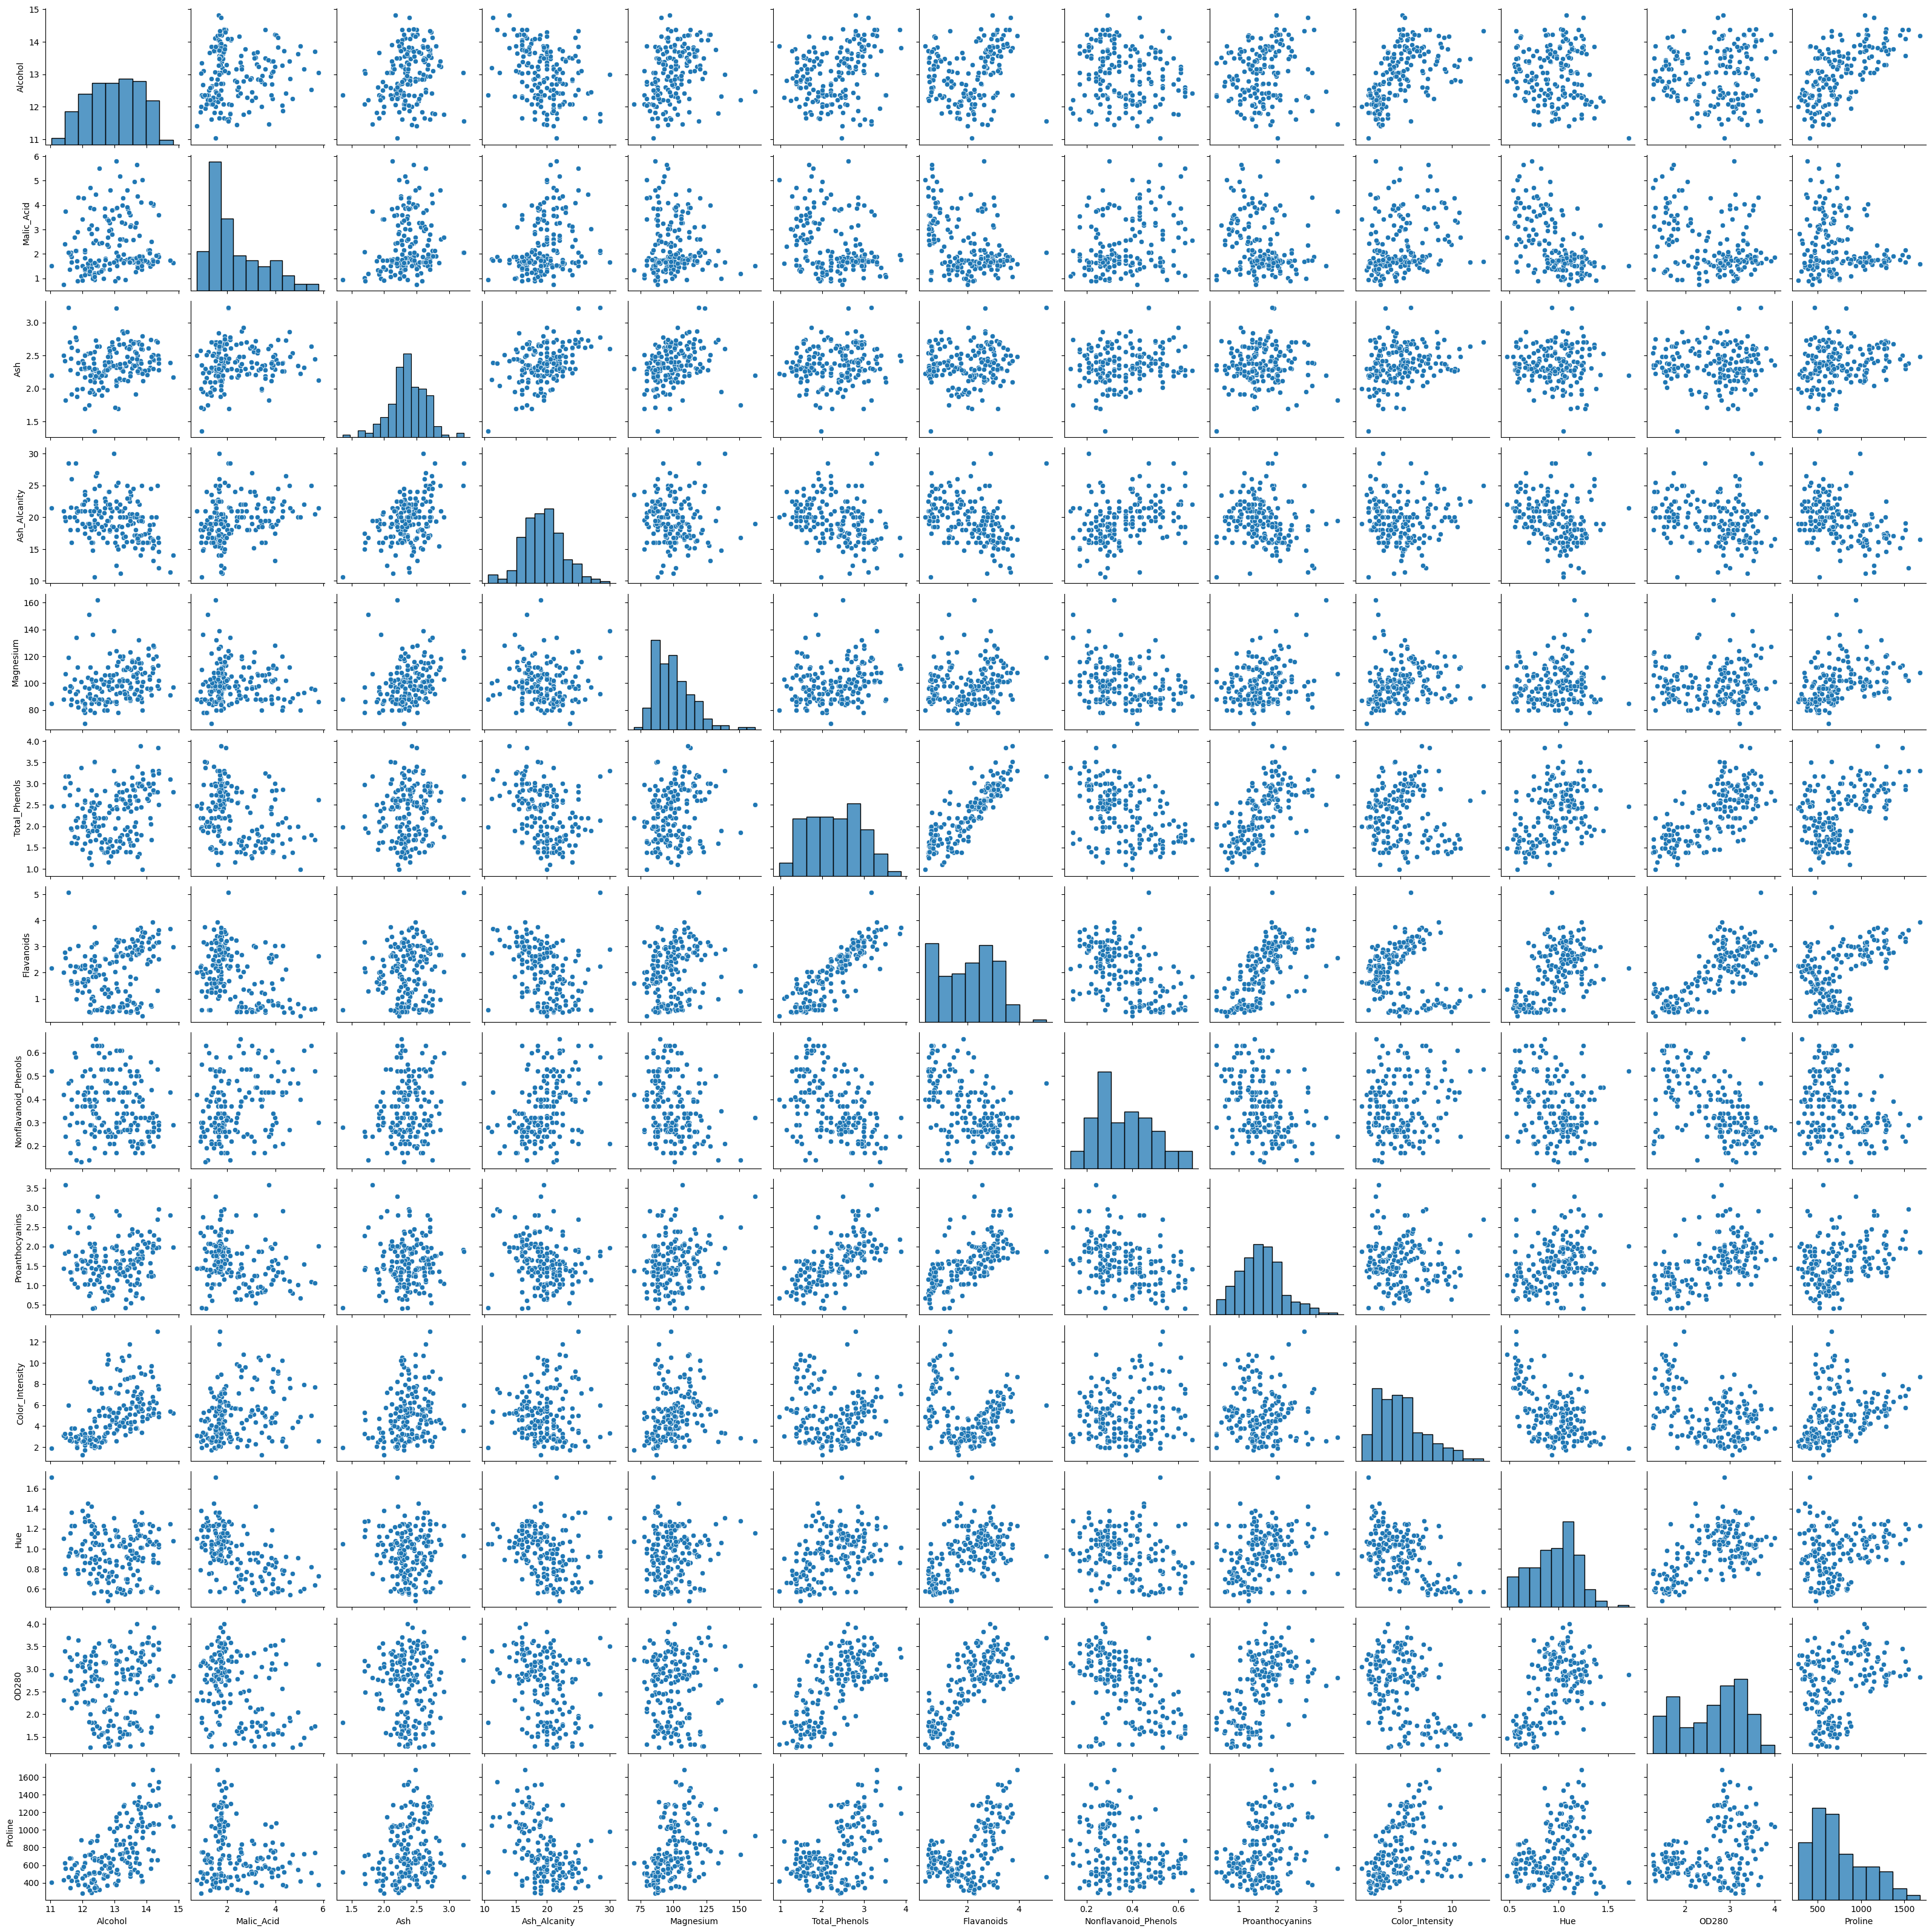

In [5]:
ax = sns.pairplot(data[data.columns])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [7]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [8]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [9]:
data2=data[['Alcohol','Magnesium']]

In [10]:
data2.head()

,Alcohol,Magnesium
0,14.23,127
1,13.20,100
2,13.16,101
3,14.37,113
4,13.24,118


In [11]:
x=data2.iloc[:,0]
y=data2.iloc[:,-1]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alcohol', ylabel='Magnesium'>

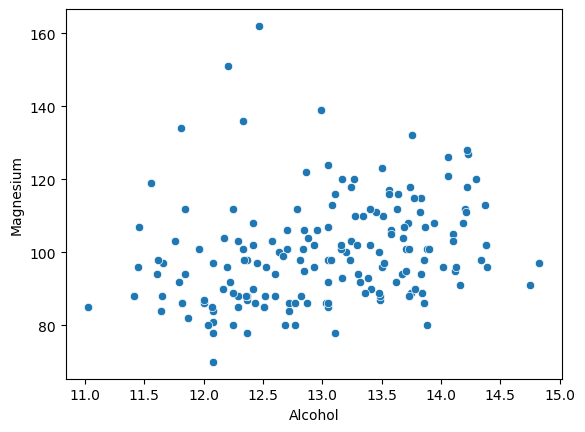

In [12]:
scatter(x,y)

In [13]:
fcm=FCM(n_clusters=3,error=1e-05,max_iter=100)
fcm.fit(data2.to_numpy())

In [14]:
fcm

FCM(n_clusters=3, max_iter=100, m=2.0, error=1e-05, random_state=None, trained=True, n_jobs=1, verbose=False, distance=<DistanceOptions.euclidean: 'euclidean'>, distance_params={}, rng=Generator(PCG64) at 0x1E545B249E0, u=array([[9.54725170e-01, 1.25849570e-02, 3.26898726e-02],
       [8.93150599e-03, 2.65035535e-02, 9.64564941e-01],
       [2.90047761e-03, 6.78181300e-03, 9.90317709e-01],
       [5.27189509e-01, 7.03236289e-02, 4.02486862e-01],
       [9.08360640e-01, 1.89260931e-02, 7.27132674e-02],
       [4.34031190e-01, 7.61996914e-02, 4.89769118e-01],
       [3.69669654e-02, 3.06557126e-01, 6.56475909e-01],
       [9.90360179e-01, 2.26142382e-03, 7.37839684e-03],
       [3.41926757e-02, 2.11161743e-01, 7.54645581e-01],
       [2.53452758e-02, 1.23241840e-01, 8.51412884e-01],
       [2.77569181e-02, 2.59410841e-02, 9.46301998e-01],
       [3.73387218e-02, 4.22782923e-01, 5.39878355e-01],
       [4.59330451e-03, 9.65750005e-01, 2.96566905e-02],
       [1.75832833e-02, 8.45170584e-0

In [15]:
fcm.u

array([[9.54725170e-01, 1.25849570e-02, 3.26898726e-02],
       [8.93150599e-03, 2.65035535e-02, 9.64564941e-01],
       [2.90047761e-03, 6.78181300e-03, 9.90317709e-01],
       [5.27189509e-01, 7.03236289e-02, 4.02486862e-01],
       [9.08360640e-01, 1.89260931e-02, 7.27132674e-02],
       [4.34031190e-01, 7.61996914e-02, 4.89769118e-01],
       [3.69669654e-02, 3.06557126e-01, 6.56475909e-01],
       [9.90360179e-01, 2.26142382e-03, 7.37839684e-03],
       [3.41926757e-02, 2.11161743e-01, 7.54645581e-01],
       [2.53452758e-02, 1.23241840e-01, 8.51412884e-01],
       [2.77569181e-02, 2.59410841e-02, 9.46301998e-01],
       [3.73387218e-02, 4.22782923e-01, 5.39878355e-01],
       [4.59330451e-03, 9.65750005e-01, 2.96566905e-02],
       [1.75832833e-02, 8.45170584e-01, 1.37246133e-01],
       [3.68803073e-03, 6.76729538e-03, 9.89544674e-01],
       [4.33386946e-01, 7.58377881e-02, 4.90775266e-01],
       [9.72505178e-01, 6.21427761e-03, 2.12805441e-02],
       [7.08758997e-01, 5.05218

In [16]:
fcm_centers=fcm.centers
fcm_centers

array([[ 13.37952828, 122.47887179],
       [ 12.66591773,  86.96129006],
       [ 13.13885517, 102.16227736]])

In [17]:
fcm_centers=pd.DataFrame(fcm_centers)
x1=fcm_centers.iloc[:,0]
y1=fcm_centers.iloc[:,-1]

In [18]:
y1=y1.to_numpy()
y1

array([122.47887179,  86.96129006, 102.16227736])

In [19]:
x1=x1.to_numpy()
x1

array([13.37952828, 12.66591773, 13.13885517])

In [37]:
fcm_labels=fcm.u.argmax(axis=1)

In [21]:
from sklearn.preprocessing import StandardScaler

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alcohol', ylabel='Magnesium'>

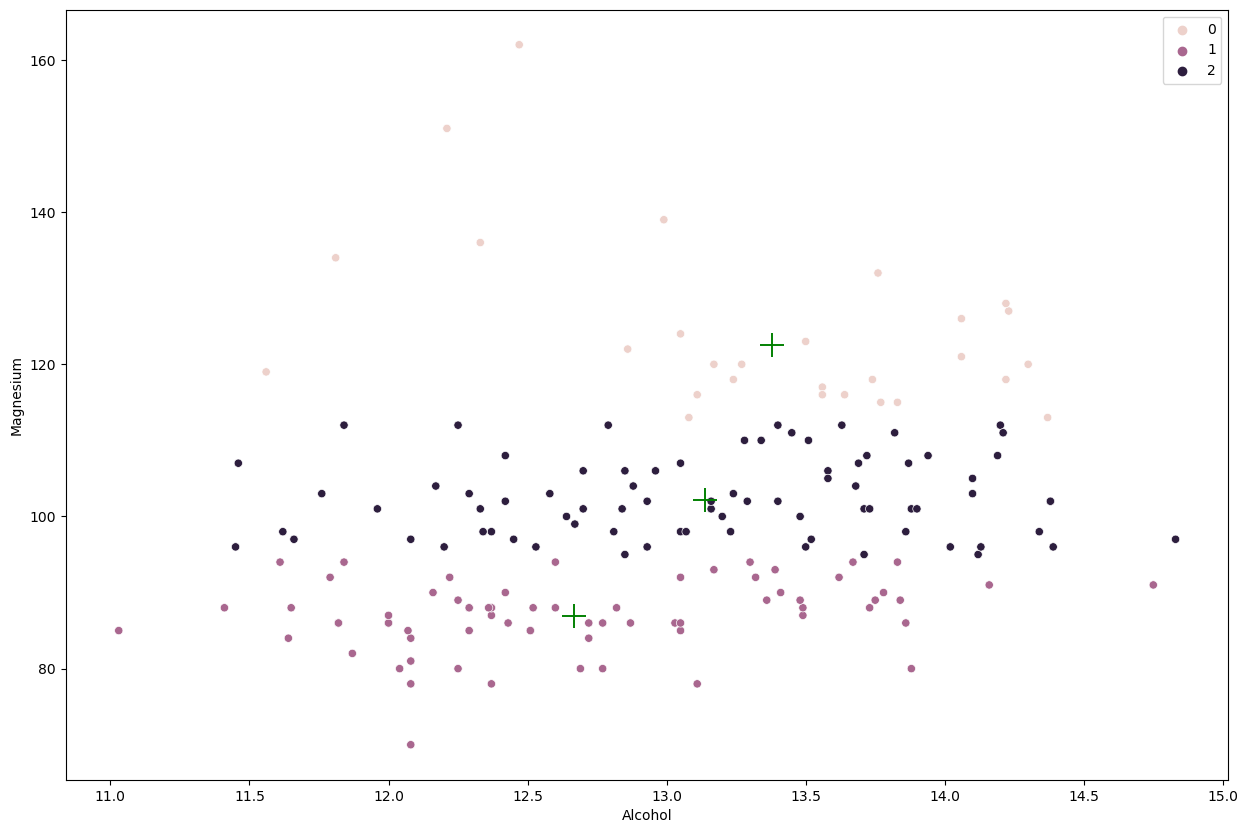

In [38]:
plt.figure(figsize=(15,10))
scatter(x,y,hue=fcm_labels)
scatter(x1, y1, s = 300, color = 'green',marker = '+')

In [28]:
plt.scatter(data[pred == 1, 0], data[pred == 1, 1], s = 10, c = 'b' )

NameError: name 'pred' is not defined